In [1]:
% cd "../"
% reload_ext autoreload
% autoreload 2

/home/akali/projects/model-trainer


In [110]:
# %cd "./model-trainer"

/home/akali/projects/model-trainer


In [2]:
import logging
from typing import Iterable, Tuple, List

from generic_iterative_stemmer.training.stemming import Word2VecStemmingTrainer, FastTextStemmingTrainer  # noqa
from generic_iterative_stemmer.utils import get_path, configure_logging

configure_logging()


def similarities_to_words(similarities: Iterable[Tuple[str, float]]) -> List[str]:
    return [word for word, _ in similarities]


log = logging.getLogger(__name__)

[22:18:56] Logging configured [generic_iterative_stemmer.utils.logging]


In [3]:
# corpus_name = "wiki-he-cbow-150"
corpus_name = "wiki-he-ft-150"
corpus_folder = get_path(corpus_name)
# trainer = Word2VecStemmingTrainer.load_from_state_file(corpus_folder=corpus_folder)
trainer = FastTextStemmingTrainer.load_from_state_file(corpus_folder=corpus_folder)

In [7]:
# trainer.train()

KeyboardInterrupt: 

In [4]:
# trainer.save_stem_dict()
model = trainer.get_stemmed_keyed_vectors()

[22:19:05] loading KeyedVectors object from ./data/wiki-he-ft-150/iter-6/model.kv [gensim.utils]
[22:19:05] loading vectors_vocab from ./data/wiki-he-ft-150/iter-6/model.kv.vectors_vocab.npy with mmap=None [gensim.utils]
[22:19:05] loading vectors_ngrams from ./data/wiki-he-ft-150/iter-6/model.kv.vectors_ngrams.npy with mmap=None [gensim.utils]
[22:19:05] setting ignored attribute vectors to None [gensim.utils]
[22:19:05] setting ignored attribute buckets_word to None [gensim.utils]
[22:19:12] FastTextKeyedVectors lifecycle event {'fname': './data/wiki-he-ft-150/iter-6/model.kv', 'datetime': '2022-01-30T22:19:12.410034', 'gensim': '4.1.2', 'python': '3.8.10 (default, Sep 28 2021, 16:10:42) \n[GCC 9.3.0]', 'platform': 'Linux-5.11.0-40-generic-x86_64-with-glibc2.29', 'event': 'loaded'} [gensim.utils]





Got total 31 different prefixes of length 1


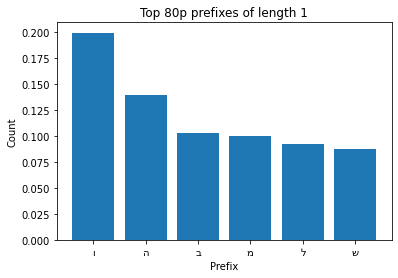

Got total 26 different suffixes of length 1


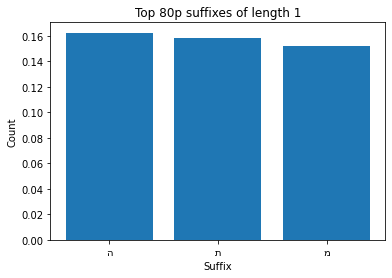




Got total 654 different prefixes of length 2


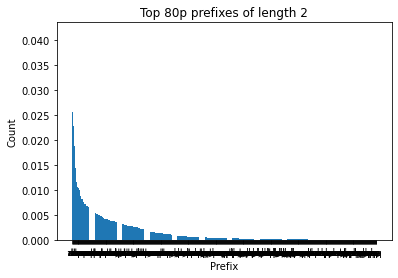

Got total 647 different suffixes of length 2


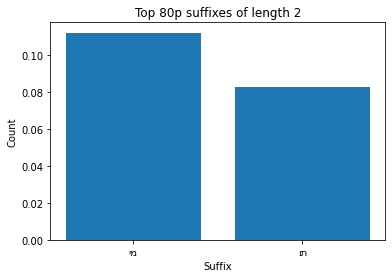

In [111]:
from typing import TypeVar, Dict
import numpy as np

T = TypeVar("T")


def hist(elements: List[T]) -> Dict[T, float]:
    histogram = {element: 0 for element in elements}
    for element in elements:
        histogram[element] += 1
    histogram = dict(sorted(histogram.items(), key=lambda x: x[1], reverse=True))
    histogram = {k: v / len(elements) for k, v in histogram.items()}
    return histogram


def plot_histogram(histogram: Dict[T, int], title: str, x_label: str, y_label: str):
    import matplotlib.pyplot as plt
    import numpy as np

    x = np.arange(len(histogram))
    y = [histogram[k] for k in histogram.keys()]
    plt.bar(x, y)
    plt.xticks(x, [k for k in histogram.keys()])
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()


stem_dict = model.stem_dict

percentile = 80


def find_common_affix(affixes: List[str], affix_type: str, affix_length: int):
    histogram = hist(affixes)
    print(f"Got total {len(histogram)} different {affix_type}es of length {affix_length}")
    # values = np.array(list(histogram.values()))
    # threshold = np.percentile(values, q=percentile)
    # top = {key: value for key, value in histogram.items() if value >= threshold}
    # top = dict(sorted(histogram.items(), key=lambda x: x[1], reverse=True)[:10])
    as_list = list(histogram.items())
    max_drop_factor = 1.64  # Need to automatically find this based on the data
    top = {}
    for i in range(len(as_list) - 1):
        current_item, next_item = as_list[i], as_list[i + 1]
        k1, v1 = current_item
        k2, v2 = next_item
        top[k1] = v1
        if v1 / v2 >= max_drop_factor:
            break
    # top = dict(as_list[i] for i in range(len(as_list) - 1) if as_list[i][1] >= drop_factor * as_list[i][1])
    # print(f"{len(top)} most common {affix_type.lower()}es of size {affix_length} for stemmed words:")
    # print(top)
    plot_histogram(
        top, f"Top {percentile}p {affix_type.lower()}es of length {affix_length}", affix_type.title(), "Count"
    )


for i in range(1, 3):
    print("\n\n")
    prefixes = np.array([inflection[:i] for inflection in stem_dict.keys()])
    suffixes = np.array([inflection[-i:] for inflection in stem_dict.keys()])
    find_common_affix(prefixes, "prefix", i)
    find_common_affix(suffixes, "suffix", i)

In [116]:
model.most_similar("מאדימ", topn=10)

[('מארינרמאדימ', 0.8884439468383789),
 ('הירח', 0.7569180727005005),
 ('אנשי-המאדימ', 0.7338298559188843),
 ('גשושית', 0.6993806958198547),
 ('הגשושית', 0.6755995154380798),
 ('מטאורואידימ', 0.6630820035934448),
 ('חלל', 0.6528779864311218),
 ('האסטרואיד', 0.6345564126968384),
 ('אסטרואיד', 0.6335639357566833),
 ('מטאורואיד', 0.6322200298309326)]

In [95]:
# from generic_iterative_stemmer.utils import load_w2v_model
#
# model_path = get_path("wiki-he-200", "cbow.model")
# model = load_w2v_model(model_path)

[00:50:55] loading Word2Vec object from ./data/wiki-he-200/cbow.model [gensim.utils]
[00:50:56] loading wv recursively from ./data/wiki-he-200/cbow.model.wv.* with mmap=None [gensim.utils]
[00:50:56] loading vectors from ./data/wiki-he-200/cbow.model.wv.vectors.npy with mmap=None [gensim.utils]
[00:50:57] loading syn1neg from ./data/wiki-he-200/cbow.model.syn1neg.npy with mmap=None [gensim.utils]
[00:50:58] setting ignored attribute cum_table to None [gensim.utils]
[00:51:07] Word2Vec lifecycle event {'fname': './data/wiki-he-200/cbow.model', 'datetime': '2022-01-28T00:51:07.470899', 'gensim': '4.1.2', 'python': '3.8.10 (default, Sep 28 2021, 16:10:42) \n[GCC 9.3.0]', 'platform': 'Linux-5.11.0-40-generic-x86_64-with-glibc2.29', 'event': 'loaded'} [gensim.utils]
[00:51:07] word2vec model loaded [generic_iterative_stemmer.utils.loader]


In [117]:
model.most_similar("גבר", topn=10)

[('גברמסקל', 0.623926043510437),
 ('גברא', 0.6175172328948975),
 ('גבר-אישה', 0.574849009513855),
 ('גבראה', 0.5686978697776794),
 ('גברט', 0.567768931388855),
 ('גברי', 0.5624161958694458),
 ('אישה', 0.5594735741615295),
 ('גברס', 0.5575984120368958),
 ('גברתי', 0.5562868118286133),
 ('שגבר', 0.5514994263648987)]

In [119]:
from numpy import ndarray, array, dot
import numpy as np

positive = ["אישה", "מלכ"]
negative = ["גבר"]
expected = "זמרת"

v1 = sum(1 * model.get_vector(p) for p in positive)
v1 += sum(-1 * model.get_vector(n) for n in negative)
v2 = model.get_vector(expected)


def cosine_similarity(x, y):
    return (x @ y) / (np.linalg.norm(x) * np.linalg.norm(y))


def most_similar_not_normalized(
    kv, positive=None, negative=None, topn=50, clip_start=0, clip_end=None, restrict_vocab=None, indexer=None, hint=None
):
    # add weights for each key, if not already present; default to 1.0 for positive and -1.0 for negative keys
    positive = [(item, 1.0) if isinstance(item, str) else item for item in positive]
    negative = [(item, -1.0) if isinstance(item, str) else item for item in negative]

    # compute the weighted average of all keys
    all_keys, mean = set(), []
    for key, weight in positive + negative:
        if isinstance(key, ndarray):
            mean.append(weight * key)
        else:
            mean.append(weight * kv.get_vector(key, norm=True))
            if kv.has_index_for(key):
                all_keys.add(kv.get_index(key))
    if not mean:
        raise ValueError("cannot compute similarity with no input")
    mean = array(mean).mean(axis=0)
    if indexer is not None and isinstance(topn, int):
        return indexer.most_similar(mean, topn)

    dists = dot(kv.vectors[clip_start:clip_end], mean) / kv.norms[clip_start:clip_end]
    if not topn:
        return dists
    best = np.argsort(dists)[::-1][: topn + len(all_keys)]
    # ignore (don't return) keys from the input
    result = [
        (kv.index_to_key[sim + clip_start], float(dists[sim])) for sim in best if (sim + clip_start) not in all_keys
    ]
    return result[:topn]


print(f"Distance to expected '{expected}' is: {cosine_similarity(v1, v2)}")
most_similar_not_normalized(kv=model, positive=positive, negative=negative, topn=10, hint=expected)

Distance to expected 'זמרת' is: 0.0031436861027032137


[('המלכה-האלמנה', 0.296379417181015),
 ('מלכין-מס', 0.2722456753253937),
 ('מלוכה', 0.26417994499206543),
 ('מלכותי', 0.26219820976257324),
 ('נסיכ', 0.26190268993377686),
 ('המלכה-העוצרת', 0.2604866623878479),
 ('אליזבת', 0.2589646577835083),
 ('מלכות', 0.2571811378002167),
 ('ממלכת', 0.2554100453853607),
 ('איזבל', 0.25307783484458923)]

In [51]:
model.similarity("שס", "הרצוג")

0.23598

In [120]:
model.most_similar(positive=["ירושלימ", "גרמניה"], negative=["ברלינ"], topn=5)

[('ספרד-ירושלימ', 0.686131477355957),
 ('מיר-ירושלימ', 0.6790103912353516),
 ('ירושלים-יריחו', 0.6479797959327698),
 ('חורב-ירושלימ', 0.6376091837882996),
 ('יפו-ירושלימ', 0.6291233897209167)]

In [121]:
model.most_similar(positive=["לונדונ", "גרמניה"], negative=["ברלינ"], topn=5)

[('בריטניה', 0.8076131343841553),
 ('אנגליה', 0.8028486371040344),
 ('אירלנדבריטניה', 0.7821201682090759),
 ('אירלנד', 0.7421994209289551),
 ('סקוטלנד', 0.7418844103813171)]

In [122]:
model.most_similar(positive=["שמש", "שבתאי", "צדק"], topn=5)

[('השמש', 0.607936441898346),
 ('נווה-צדק', 0.5932590961456299),
 ('ירח', 0.5838311910629272),
 ('ירחי-שמשי', 0.5565984845161438),
 ('מצקר-הלוי', 0.5458218455314636)]

In [123]:
import pandas as pd

base_word = "גבר"
others = model.index_to_key[0:2000]
similarities: list = model.most_similar(base_word, topn=20)


def get_similarity(model, word):
    return word, model.similarity(base_word, word)


similarities.append(get_similarity(model, "קיפוד"))
similarities.append(get_similarity(model, "תפוח"))
similarities.append(get_similarity(model, "קילו"))
similarities.append(get_similarity(model, "פסיפס"))


def representative_distances(model, representative: str, others: List[str]):
    return model.distances(representative, other_words=others)


def association_similarity(w1: str, w2: str, others):
    x1 = representative_distances(model, w1, others)
    x2 = representative_distances(model, w2, others)
    return (x1.T @ x2) / len(others)


records = []
for similar_word, grade in similarities:
    association = association_similarity(base_word, similar_word, others)
    record = (f"x {similar_word} x", grade, association)
    records.append(record)

df = pd.DataFrame(data=records, columns=["word", "cosine_similarity", "association_similarity"])

print(df.sort_values("cosine_similarity", ascending=False)[::5])

           word  cosine_similarity  association_similarity
0   x גברמסקל x           0.623926                1.041177
5      x גברי x           0.562416                1.013833
10     x נערה x           0.527326                1.066127
15    x מזדקנ x           0.485710                1.059941
20    x קיפוד x           0.108084                1.003731


In [11]:
import pyperclip
import math
from generic_iterative_stemmer.training.base.create_corpus import hebrew_tokenizer_no_suffix
from generic_iterative_stemmer.training.stemming import CorpusStemmer

sentence = """
לצד המחקר ההיסטורי קיימים ענפי מחקר מקבילים הפעילים מחוץ לאקדמיה, אחד מהם ידוע גם בשם פסבדו-היסטוריה כלומר מחקר המתיימר להיות מדעי או  להיתמך על–ידי המדע, אך על–פי דעת עיקר הקהילה המדעית אינם עומדים בדרישות השיטה המדעית. מדובר במחקרים - לכאורה, ספרים סרטים המשתמשים בממצאים  ארכאולוגיים, מחקרים היסטוריים ומתחומי מדע אחרים על מנת לבסס לכאורה  תאוריות סנסציוניות. ספריו של אריך פון דניקן שייכים לקטגוריה זו, בספרו  מרכבות האלים, שיצא לאור ב-1968, וספרים אחרים שפורסמו לאחר מכן הוא מסתמך כביכול על ממצאים ארכאולוגיים וטקסטים עתיקים כדי להוכיח שהאלים  במיתוסים של דתות שונות הם בעצם חייזרים, שהגיעו בחלליות לכדור הארץ לפני אלפי שנים. העובדה שספר המכיל כל־כך הרבה חצאי אמיתות ולעיתים  טעויות גסות הפך לרב־מכר היא התעלומה המרכזית וחידה לא פתורה בפני עצמה. ספריו עדיין נמכרים היטב, לרעיונותיו יש ביקוש רב ופון דניקן הוא מרצה מבוקש.
"""

sentence_no_suffix = " ".join(hebrew_tokenizer_no_suffix(sentence, 0, 20))
corpus_stemmer = CorpusStemmer(stem_dict=model.stem_dict)
stemmed_sentence = corpus_stemmer.stem_sentence(sentence_no_suffix)


def add_new_lines(text: str, n: int = 10) -> str:
    words = text.split()
    amount_of_batches = math.ceil(len(words) / n)
    word_batches = [words[i * n : min((i + 1) * n, len(words))] for i in range(amount_of_batches)]
    parts = [" ".join(batch) for batch in word_batches]
    return "\n".join(parts)


# result = add_new_lines(stemmed_sentence.stemmed_sentence)
result = add_new_lines(sentence_no_suffix)
print(result)
pyperclip.copy(result)

לצד מחקר היסטורי קיימ ענפ מחקר מקבילימ פעילימ מחוצ אקדמיה
אחד מהמ ידוע גמ בשמ פסבדו-היסטוריה כלומר מחקר מתיימר להיות
מדעי או להיתר על ידי מדע אכ על פי דעת
עיקר הקהילה המדעית אינמ עמד דרישות שיטה המדעית מדובר מחקר
- לכאורה ספרימ סרט משתמש ממצאימ ארכאולוגי מחקר היסטוריימ תחומ
מדע אחרימ על מנת לבסס לכאורה תאוריות ציונות ספרי של
אריכ פונ דניקנ שייכ קטגוריה זו ספר מרכבות האל יצא
לאור ב- ספרימ אחרימ פרסמ לאחר מכנ הוא מסתמכ כביכול
על ממצאימ ארכאולוגי טקסט עתיקימ כדי להניח האל מיתוס של
דתות שונות המ בעצמ חייזרימ הגיע חלל כדור הארצ לפני
אלפ שנימ העובדה ספר מכיל לככ הרבה חצאי אמיתות לעיתימ
טעויות גסות הפכ למכר היא תעלומה המרכזית חידה לא תורה
בפני עצמה ספרי עדיינ נמכרימ היטב רעיונ יש ביקוש רב
ופונ דניקנ הוא מרצה מבוקש


QXcbClipboard::setMimeData: Cannot set X11 selection owner
